<a href="https://colab.research.google.com/github/NehaBhatia103/DataScienceAssignmentsSET2/blob/main/AssignmentMLR_50_startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import normalize

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
data=pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


There is no null values present in data set as the no of counts are 50.
Mean and median of the data is approximaetly same hence the data is normally distributed

In [ ]:
data.info()  # there is no null value in any of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data[data.duplicated()]  # no duplicates found

,R&D Spend,Administration,Marketing Spend,State,Profit


Checking for Outliers:

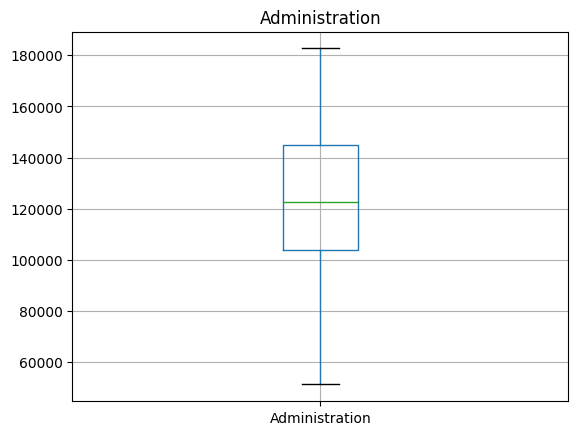

In [ ]:
data.boxplot(["Administration"])
plt.title("Administration")
plt.show()

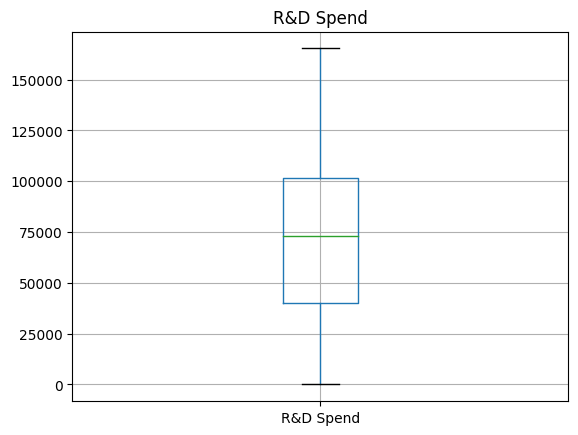

In [ ]:
data.boxplot(["R&D Spend"])
plt.title("R&D Spend")
plt.show()

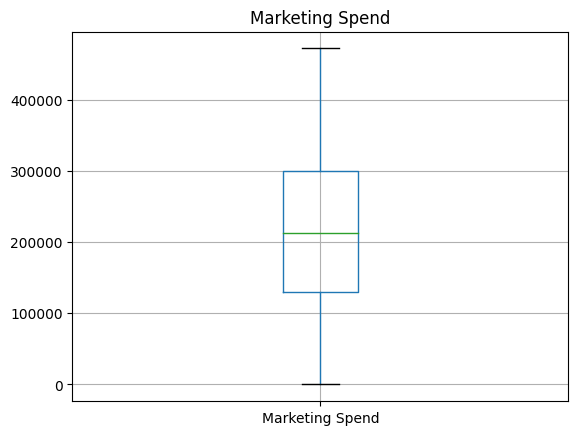

In [ ]:
data.boxplot(["Marketing Spend"])
plt.title("Marketing Spend")
plt.show()

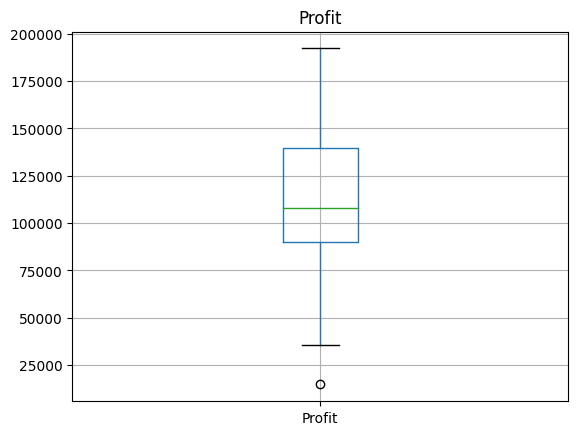

In [ ]:
data.boxplot(["Profit"])
plt.title("Profit")
plt.show()

There are outliers in profit only.Since the outliers are present in less number we can ignore them.

In [ ]:
data=data.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)
data.head()

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


##Visualization:

<Axes: xlabel='RnD', ylabel='Density'>

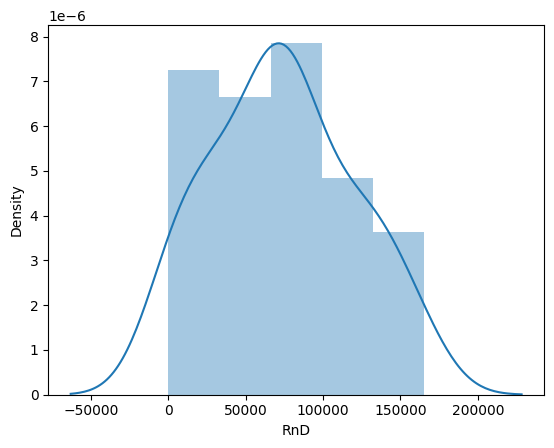

In [ ]:
sns.distplot(data["RnD"])

<Axes: xlabel='admin', ylabel='Density'>

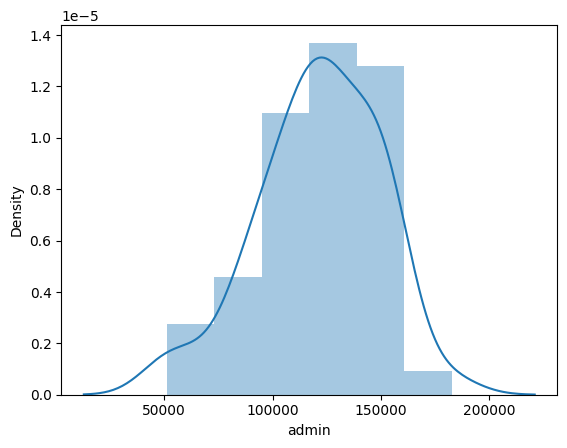

In [ ]:
sns.distplot(data["admin"])

<Axes: xlabel='marketing', ylabel='Density'>

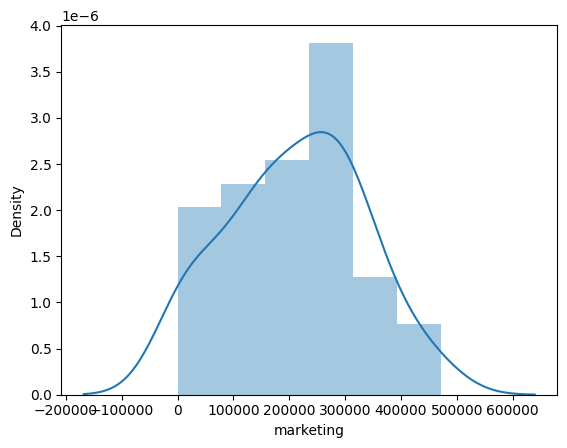

In [ ]:
sns.distplot(data["marketing"])

<Axes: xlabel='profit', ylabel='Density'>

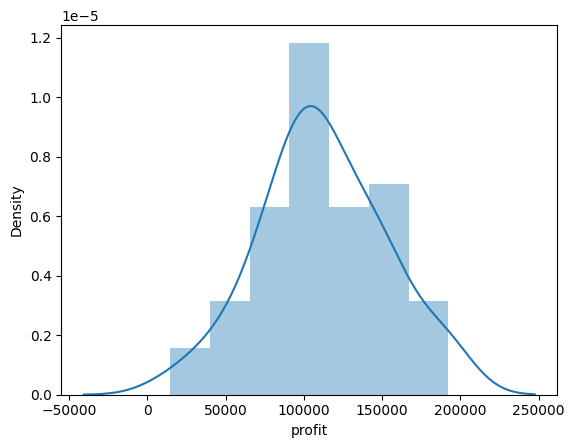

In [ ]:
sns.distplot(data["profit"])

<Axes: ylabel='state'>

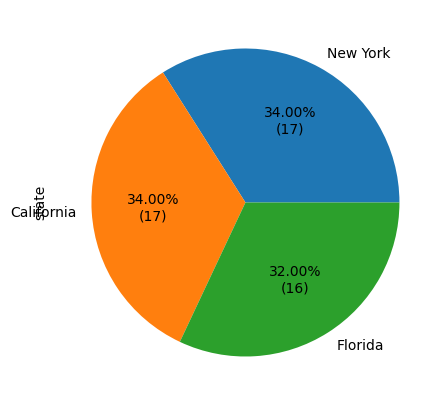

In [ ]:
plt.figure(figsize=(5,5))
data['state'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(data['state'].value_counts().sum())))

In [ ]:
data["state"].value_counts()

New York      17
California    17
Florida       16
Name: state, dtype: int64

Finding the relation between all the independent features with respect to dependent feature

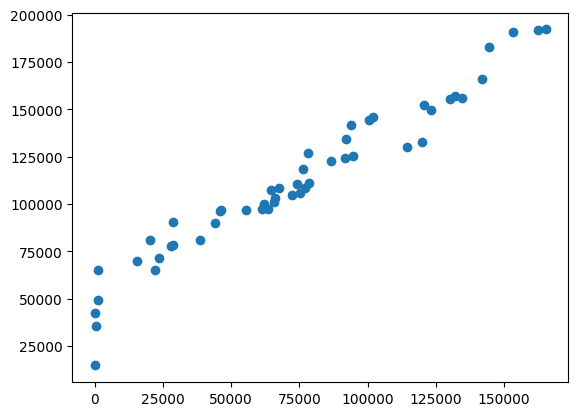

In [ ]:
plt.scatter(data['RnD'],data['profit'])

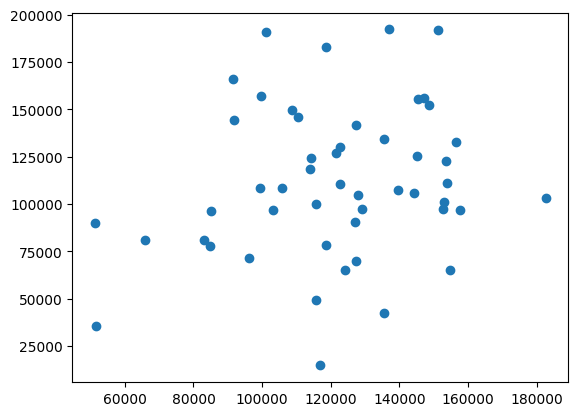

In [ ]:
plt.scatter(data['admin'],data['profit'])

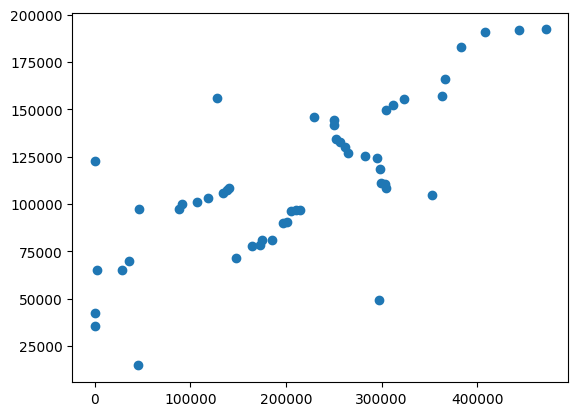

In [ ]:
plt.scatter(data['marketing'],data['profit'])

<Axes: xlabel='state', ylabel='profit'>

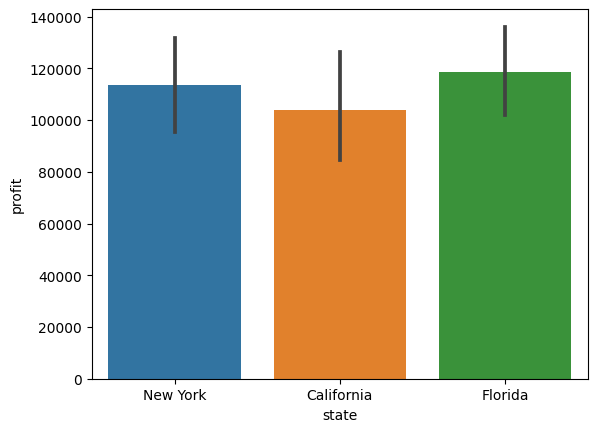

In [ ]:
sns.barplot(x="state",y="profit",data=data)

from the above plots we could see that state column has approx same value of profit hence there is not much difference between how much profit each state makes with other variables.Hence we can drop the column state

In [ ]:
data=data.drop("state",axis=1)

In [ ]:
data.head()

,RnD,admin,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


checking the correlation between variables

In [ ]:
corr=data.corr()
corr

,RnD,admin,marketing,profit
RnD,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
marketing,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

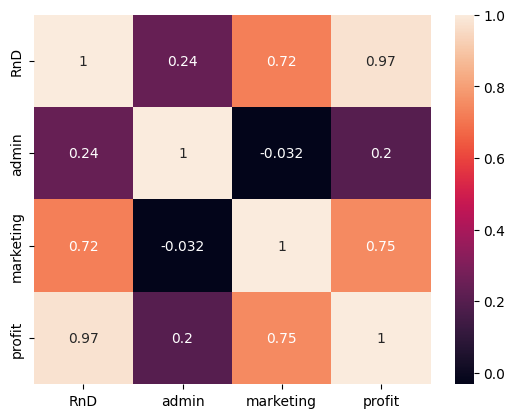

In [ ]:
sns.heatmap(corr,annot=True)

from the plot we can see there is highest value of correlation for r&d.
and also profit depends on marketing also.

Splitting the data set into dependent and  independent variables x and y.

##Preprocessing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data['RnD']=scaler.fit_transform(data[['RnD']])
data['admin']=scaler.fit_transform(data[['admin']])
data['marketing']=scaler.fit_transform(data[['marketing']])
data['profit']=scaler.fit_transform(data[['profit']])

In [ ]:
data.head()

,RnD,admin,marketing,profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


In [ ]:
x=data.iloc[:,:3]
x.head()

,RnD,admin,marketing
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528


In [ ]:
y=data.profit
y.head()

0    2.011203
1    1.999430
2    1.980842
3    1.776627
4    1.357740
Name: profit, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

#Building Model
1.Liner Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)
y_pred_test

array([ 0.43837618,  0.95911686,  1.55238443,  1.01732893, -1.66116521,
        1.98129281, -0.25715324,  0.03592783, -1.69290344, -0.05043324])

finding accuracy of the model

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


In [ ]:
R2_test=r2_score(y_pred_test,y_test)
R2_train=r2_score(y_pred_train,y_train)
print(R2_test,"  ",R2_train)

0.9562881442867325    0.9468920762780187


2. Lasso Model

In [ ]:
def score(y_predict, y_true):
  error = np.square(np.log10(y_predict +1) - np.log10(y_true +1)).mean() ** 0.5
  score = 1 - error
  return score
  actual_cost = list(data_val['COST'])
  actual_cost = np.asarray(actual_cost)

In [ ]:
from sklearn.linear_model import Lasso
#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso()
#Fitting the Training data to the Lasso regressor
lasso_reg.fit(x_train,y_train)
#Predicting for X_test
y_pred_lass_test =lasso_reg.predict(x_test)
y_pred_lass_train=lasso_reg.predict(x_train)
y_pred_lass_test

array([-0.06041799, -0.06041799, -0.06041799, -0.06041799, -0.06041799,
       -0.06041799, -0.06041799, -0.06041799, -0.06041799, -0.06041799])

In [ ]:
print('R squared training set', round(lasso_reg.score(x_train, y_train)*100, 2))
print('R squared test set', round(lasso_reg.score(x_test, y_test)*100, 2))

R squared training set 0.0
R squared test set -7.91


## Model Validation
# Collinearity Check

In [ ]:
# VIF=1/(1-Rsquare)
import statsmodels.formula.api as smf
model1=smf.ols("profit~RnD+admin+marketing",data=data).fit()

rsq_r=smf.ols("RnD~admin+marketing",data=data).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("admin~RnD+marketing",data=data).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("marketing~RnD+admin",data=data).fit().rsquared
vif_m=1/(1-rsq_m)

d1={'Variables':['RnD','admin','marketing'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RnD,2.468903
1,admin,1.175091
2,marketing,2.326773


none of the varianle have VIF>20 hence no collinearity is found.
## Residual Analysis


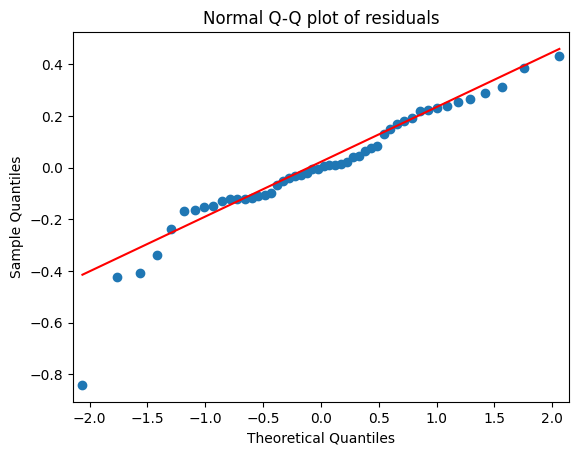

In [ ]:
import statsmodels.api as sm
sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model1.resid<-30000))

[array([], dtype=int64)]

In [ ]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()

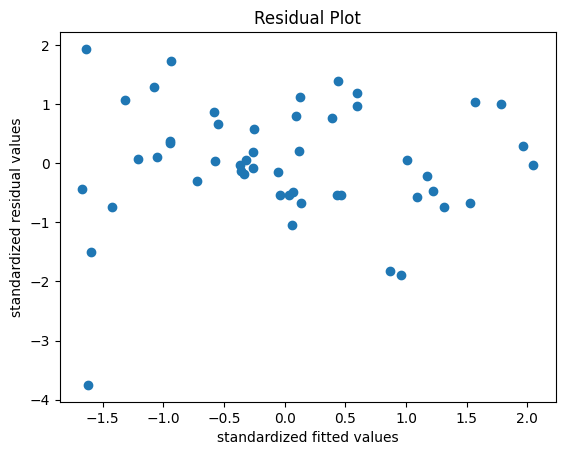

In [ ]:
plt.scatter(standard_values(model1.fittedvalues),standard_values(model1.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

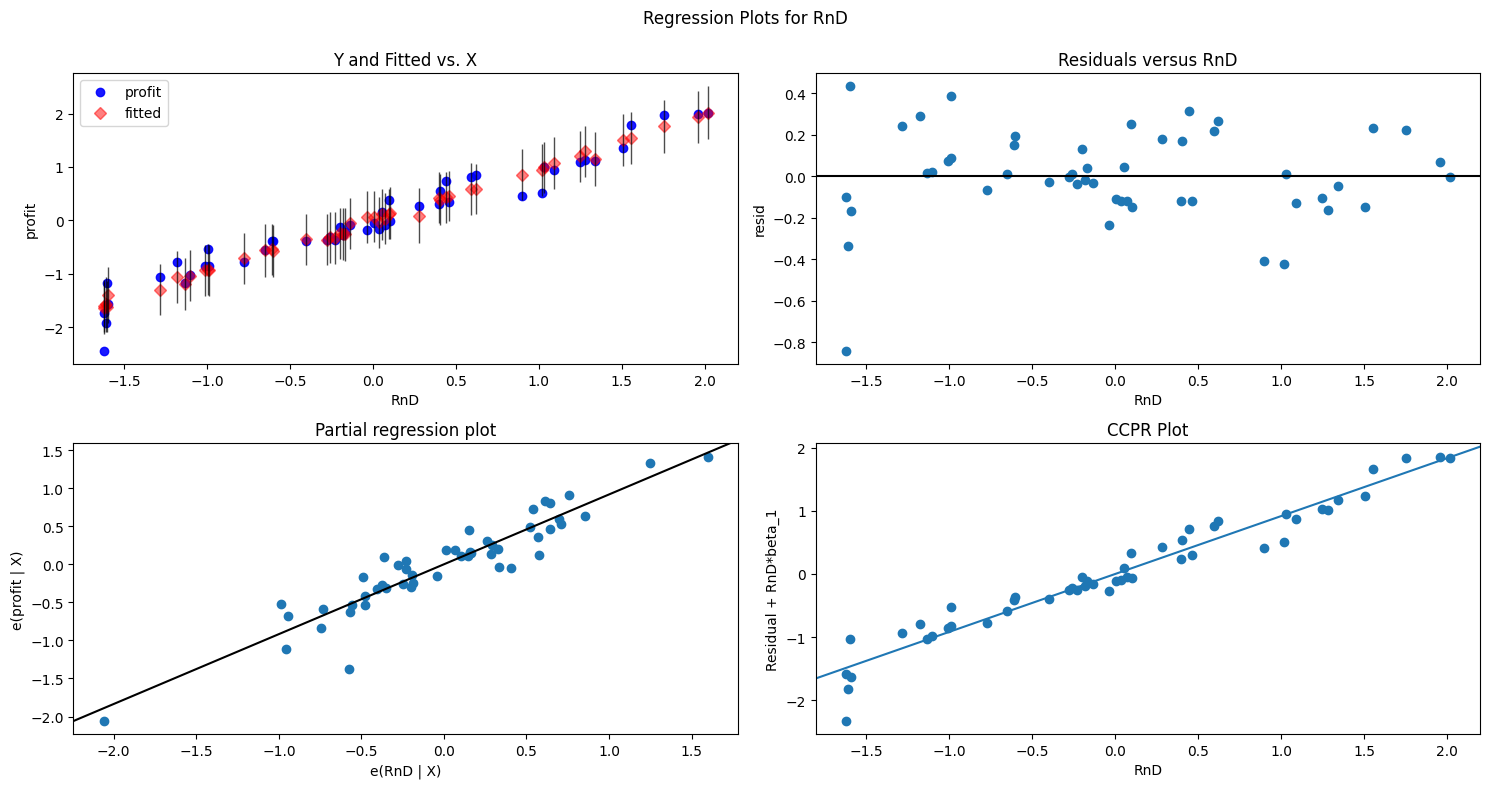

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'RnD',fig=fig)
plt.show()

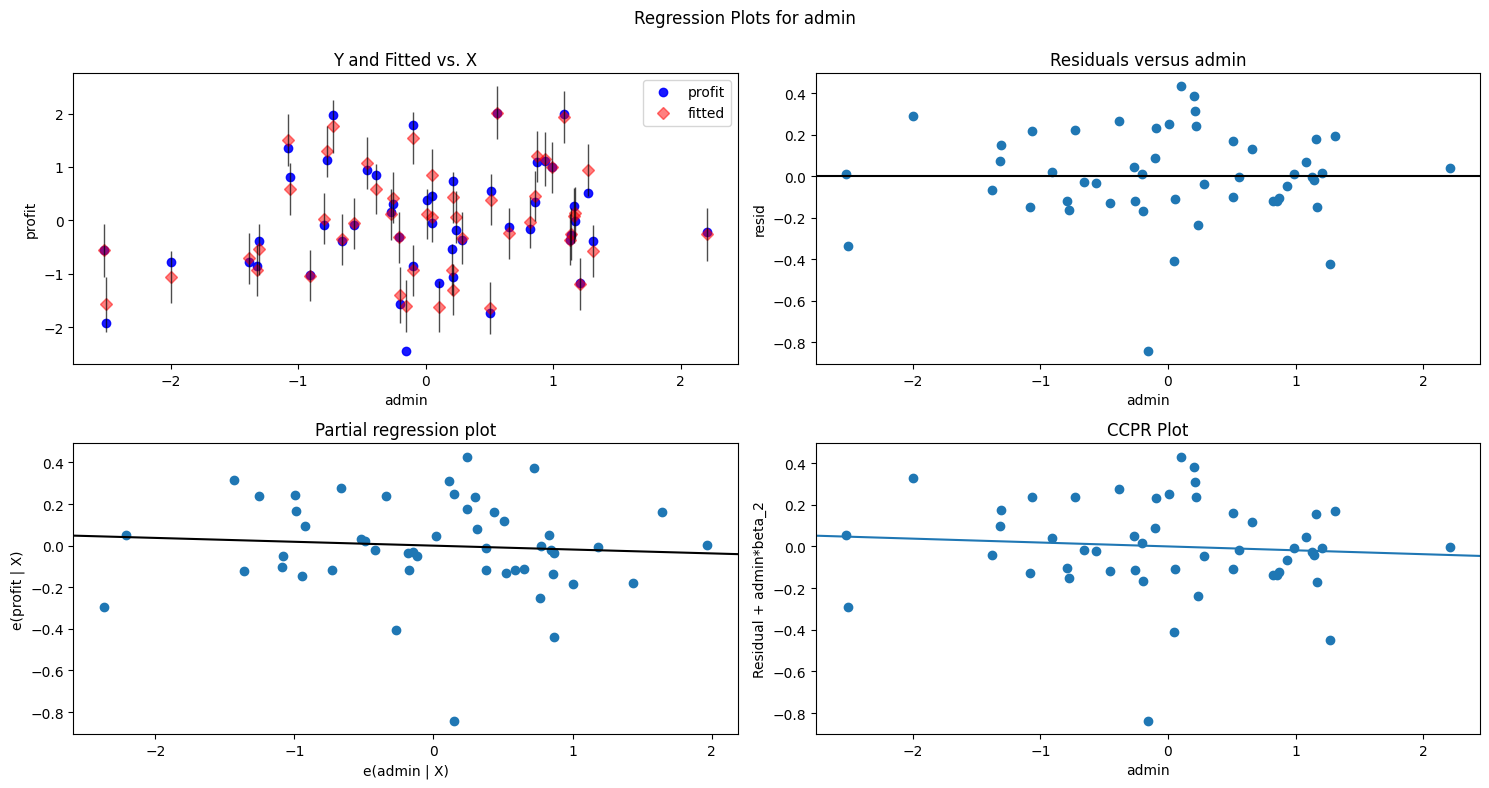

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'admin',fig=fig)
plt.show()

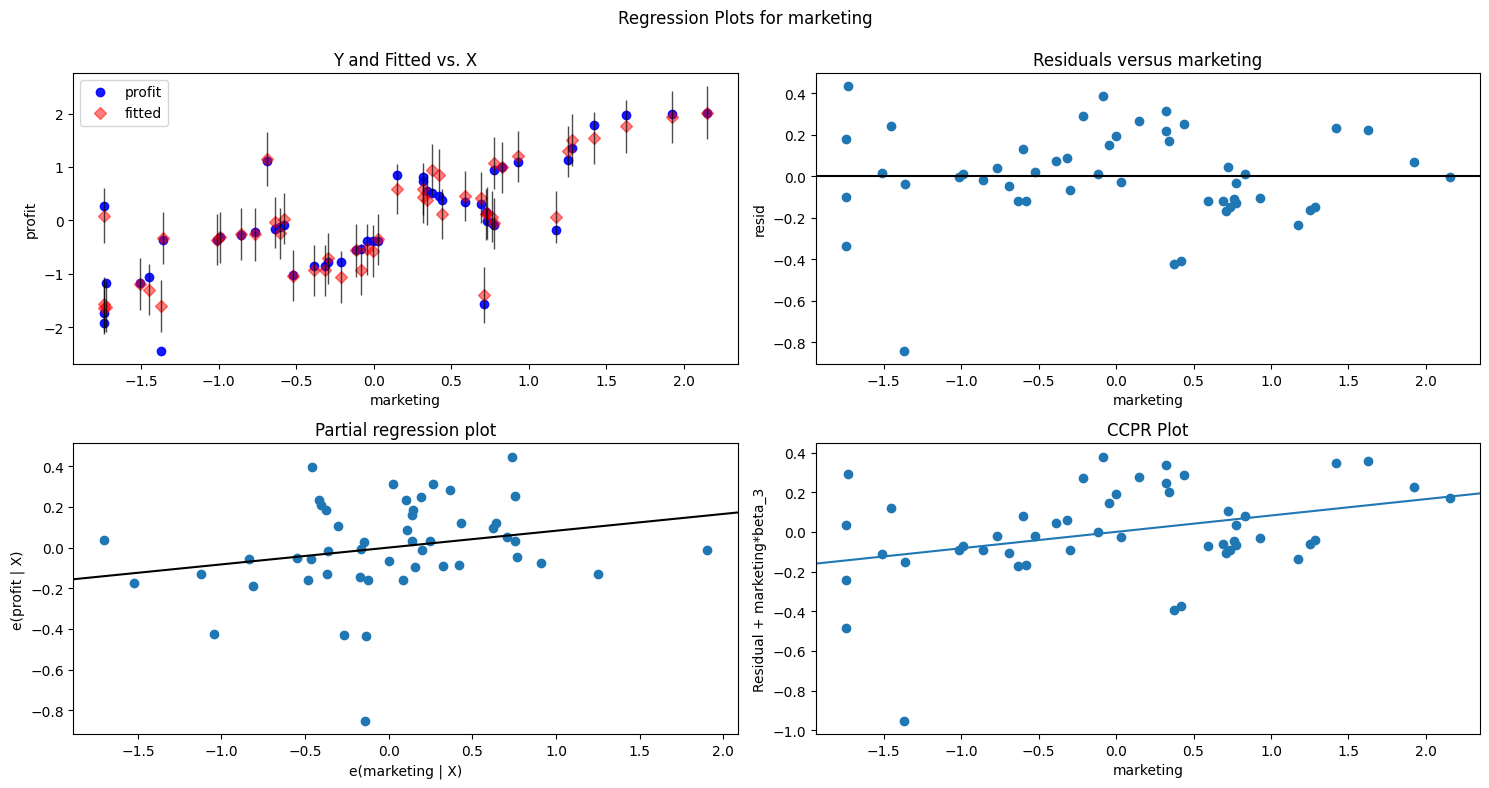

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1,'marketing',fig=fig)
plt.show()

#Model Deletiohn Techniques
# Cook's Distance

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
(c,_)=model1.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

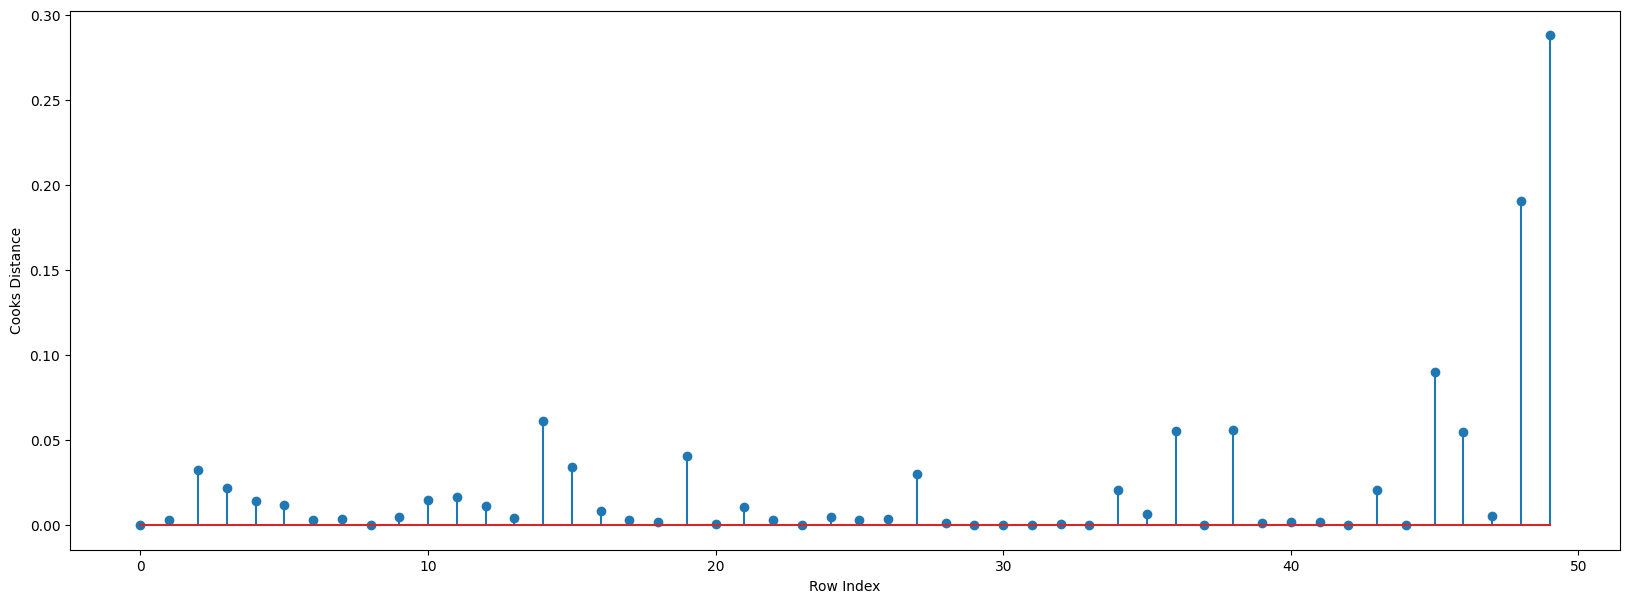

In [ ]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
np.argmax(c) , np.max(c)

(49, 0.2880822927543273)

# Leverage Cut off

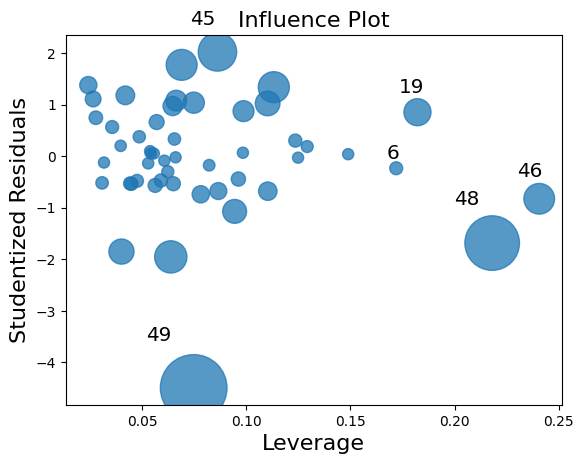

In [ ]:
influence_plot(model1)
plt.show()

In [ ]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.3

In [ ]:
data[data.index.isin([49])]

,RnD,admin,marketing,profit
49,-1.622362,-0.157226,-1.369985,-2.439313


In [ ]:
data2=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data2

,RnD,admin,marketing,profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740
5,1.279800,-0.776239,1.254210,1.127250
6,1.340066,0.932147,-0.688150,1.105481
7,1.245057,0.871980,0.932186,1.096210
8,1.030369,0.986952,0.830887,1.007470
9,1.091819,-0.456640,0.776107,0.946022


## Final Model

In [ ]:
while np.max(c)>0.5 :
    model1=smf.ols("profit~RnD+admin+marketing",data=data2).fit()
    (c,_)=model1.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("profit~RnD+admin+marketing",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [ ]:
final_model.rsquared

0.9613162435129847

#Predictions

In [ ]:
new_data=pd.DataFrame({'RnD':65000,"admin":70000,"marketing":140000},index=[0])
new_data

,RnD,admin,marketing
0,65000,70000,140000


In [ ]:
final_model.predict(new_data)

0    67599.439693
dtype: float64

In [ ]:
pred_y=final_model.predict(data2)
pred_y

0     1.972479
1     1.892793
2     1.718321
3     1.514959
4     1.474919
5     1.267383
6     1.146052
7     1.186311
8     0.985341
9     1.058222
10    0.588835
11    0.587959
12    0.434649
13    0.395164
14    0.934380
15    0.850235
16    0.135961
17    0.461040
18    0.428976
19    0.115996
20    0.127442
21    0.147825
22    0.081090
23   -0.035325
24    0.051087
25   -0.215899
26   -0.011654
27    0.072768
28   -0.225192
29   -0.224430
30   -0.284610
31   -0.323912
32   -0.292897
33   -0.327067
34   -0.537838
35   -0.508842
36   -0.875467
37   -0.533573
38   -1.017005
39   -0.673297
40   -0.886871
41   -0.890214
42   -0.990455
43   -1.238578
44   -1.127461
45   -1.542699
46   -1.345181
47   -1.569804
48   -1.512604
dtype: float64

In [ ]:
d2={'Prep_Models':['Model1','Final_Model'],'Rsquared':[model1.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model1,0.950746
1,Final_Model,0.961316
